In [5]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import urllib
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.simplefilter('ignore')
import folium

In [54]:
df14 = pd.read_csv('2014년 졸음운전 교통사고.csv',engine='python')
y14=[]
m14=[]
#df15['구분'][0:9]
for n in df14['구분'][0:10]:
    y14.append(int(n[0:4]))
    m14.append(int(n[5:6]))
    #print(n[0:4])
for n in df14['구분'][10:]:
    y14.append(int(n[0:4]))
    m14.append(int(n[5:7]))
date14={'년도':y14,'월':m14}
df14_date = pd.DataFrame(date14)
df14_date
df14_fil=pd.concat([df14_date,df14],axis=1)
df14_fil.drop(columns=['구분'],inplace=True)
df14_fil

년도   월  사고(건)  사망(명)  부상(명)
0   2014   1    169      7    347
1   2014   2    145      3    268
2   2014   3    206     12    358
3   2014   4    182      4    360
4   2014   5    218     17    474
5   2014   6    233     13    457
6   2014   7    229     14    431
7   2014   8    222      9    447
8   2014   9    225     15    430
9   2014   1    210     14    392
10  2014  11    209     10    386
11  2014  12    178     12    329

In [52]:
df15 = pd.read_csv('2015년 졸음운전 교통사고.csv',engine='python')
#df15.set_index('구분',inplace=True)
#df15['구분'].iloc[0][0:5]
y15=[]
m15=[]
#df15['구분'][0:9]
for n in df15['구분'][0:10]:
    y15.append(int(n[0:4]))
    m15.append(int(n[5:6]))
    #print(n[0:4])
for n in df15['구분'][10:]:
    y15.append(int(n[0:4]))
    m15.append(int(n[5:7]))
date15={'년도':y15,'월':m15}
df15_date = pd.DataFrame(date15)
df15_date
df15_fil=pd.concat([df15_date,df15],axis=1)
df15_fil.drop(columns=['구분'],inplace=True)
df15_fil

년도   월  사고(건)  사망(명)  부상(명)
0   2015   1    205      8    375
1   2015   2    175      8    375
2   2015   3    237      4    492
3   2015   4    227     10    486
4   2015   5    231      9    504
5   2015   6    207      8    401
6   2015   7    273      7    556
7   2015   8    268     19    534
8   2015   9    252     10    501
9   2015   1    214     14    475
10  2015  11    199      3    398
11  2015  12    213      8    428

In [55]:
df16 = pd.read_csv('2016년 졸음운전 교통사고.csv',engine='python')
y16=[]
m16=[]
#df15['구분'][0:9]
for n in df16['구분'][0:10]:
    y16.append(int(n[0:4]))
    m16.append(int(n[5:6]))
    #print(n[0:4])
for n in df16['구분'][10:]:
    y16.append(int(n[0:4]))
    m16.append(int(n[5:7]))
date16={'년도':y16,'월':m16}
df16_date = pd.DataFrame(date16)
df16_date
df16_fil=pd.concat([df16_date,df16],axis=1)
df16_fil.drop(columns=['구분'],inplace=True)
df16_fil

년도   월  사고(건)  사망(명)  부상(명)
0   2016   1    192      5    387
1   2016   2    174      6    328
2   2016   3    217      7    435
3   2016   4    216      7    419
4   2016   5    239     13    522
5   2016   6    200     12    362
6   2016   7    227      9    460
7   2016   8    230      7    490
8   2016   9    187     13    347
9   2016   1    183     10    367
10  2016  11    200      5    418
11  2016  12    168      4    364

In [57]:
df=pd.concat([df14_fil,df15_fil,df16_fil])
df

년도   월  사고(건)  사망(명)  부상(명)
0   2014   1    169      7    347
1   2014   2    145      3    268
2   2014   3    206     12    358
3   2014   4    182      4    360
4   2014   5    218     17    474
5   2014   6    233     13    457
6   2014   7    229     14    431
7   2014   8    222      9    447
8   2014   9    225     15    430
9   2014   1    210     14    392
10  2014  11    209     10    386
11  2014  12    178     12    329
0   2015   1    205      8    375
1   2015   2    175      8    375
2   2015   3    237      4    492
3   2015   4    227     10    486
4   2015   5    231      9    504
5   2015   6    207      8    401
6   2015   7    273      7    556
7   2015   8    268     19    534
8   2015   9    252     10    501
9   2015   1    214     14    475
10  2015  11    199      3    398
11  2015  12    213      8    428
0   2016   1    192      5    387
1   2016   2    174      6    328
2   2016   3    217      7    435
3   2016   4    216      7    419
4   2016   5    239     13    522
5   2016   6    200     12    362
6   2016   7    227      9    460
7   2016   8    230      7    490
8   2016   9    187     13    347
9   2016   1    183     10    367
10  2016  11    200      5    418
11  2016  12    168      4    364

In [59]:
# 년도/월 멀티 인덱스 
df1=df.pivot_table(index=['년도','월'])
df1

부상(명)  사고(건)  사망(명)
년도   월                      
2014 1   369.5  189.5   10.5
     2   268.0  145.0    3.0
     3   358.0  206.0   12.0
     4   360.0  182.0    4.0
     5   474.0  218.0   17.0
     6   457.0  233.0   13.0
     7   431.0  229.0   14.0
     8   447.0  222.0    9.0
     9   430.0  225.0   15.0
     11  386.0  209.0   10.0
     12  329.0  178.0   12.0
2015 1   425.0  209.5   11.0
     2   375.0  175.0    8.0
     3   492.0  237.0    4.0
     4   486.0  227.0   10.0
     5   504.0  231.0    9.0
     6   401.0  207.0    8.0
     7   556.0  273.0    7.0
     8   534.0  268.0   19.0
     9   501.0  252.0   10.0
     11  398.0  199.0    3.0
     12  428.0  213.0    8.0
2016 1   377.0  187.5    7.5
     2   328.0  174.0    6.0
     3   435.0  217.0    7.0
     4   419.0  216.0    7.0
     5   522.0  239.0   13.0
     6   362.0  200.0   12.0
     7   460.0  227.0    9.0
     8   490.0  230.0    7.0
     9   347.0  187.0   13.0
     11  418.0  200.0    5.0
     12  364.0  168.0    4.0

In [72]:
# 2016년 사고대비 사망율
df1_2016=df1.loc[2016]['사망률']=df1.loc[2016]['사망(명)']/df1.loc[2016]['사고(건)']
df1_2016

월
1     0.040000
2     0.034483
3     0.032258
4     0.032407
5     0.054393
6     0.060000
7     0.039648
8     0.030435
9     0.069519
11    0.025000
12    0.023810
dtype: float64

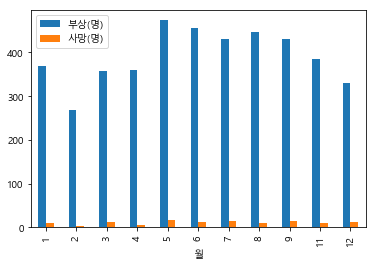

In [77]:
# 2014년 월별 사망 , 부상 데이터를 바차트로 
df1.loc[2014][['부상(명)','사망(명)']].plot(kind='bar')
plt.show()

In [99]:
# 2015년 대비, 2016년 사망이 가장 많이 증가.
incre=df1.loc[2016]['사망(명)']-df1.loc[2015]['사망(명)']
print(incre.idxmax())

5
